<a href="https://colab.research.google.com/github/photostachio/Build-1/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
face = 'https://raw.githubusercontent.com/photostachio/Build-1/master/facebook-fact-check.csv'
df = pd.read_csv(face)
df.head()


,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [3]:
df.shape


(2282, 12)

In [0]:
df.drop(["account_id", "post_id","Debate", "Post URL","Post Type", "Date Published"],
        axis = 1, inplace = True)

In [5]:
df.isnull().sum()

Category           0
Page               0
Rating             0
share_count       70
reaction_count     2
comment_count      2
dtype: int64

In [6]:
df = df.replace(np.nan, 0)
df.isnull().sum()

Category          0
Page              0
Rating            0
share_count       0
reaction_count    0
comment_count     0
dtype: int64

In [7]:
Category_Counts = df['Category'].value_counts()
Category_Counts

mainstream    1145
right          666
left           471
Name: Category, dtype: int64

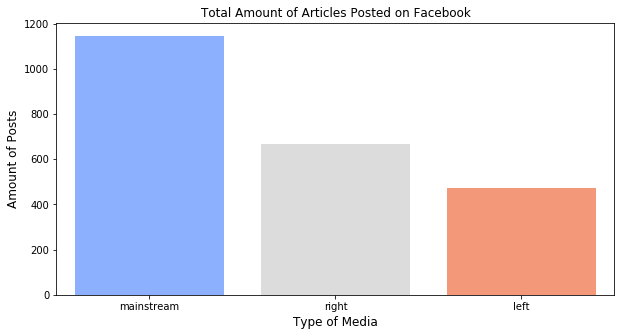

In [8]:
Total_count  = Category_Counts
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Total_count.index, Total_count.values, palette='coolwarm', saturation=1)
plt.title('Total Amount of Articles Posted on Facebook')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Type of Media', fontsize=12)
plt.show()

In [9]:
Page_Counts = df['Page'].str.split('|', expand=True).stack().value_counts()
Page_Counts

Politico             536
CNN Politics         409
Eagle Rising         286
Right Wing News      268
Occupy Democrats     209
ABC News Politics    200
Addicting Info       140
The Other 98%        122
Freedom Daily        112
dtype: int64

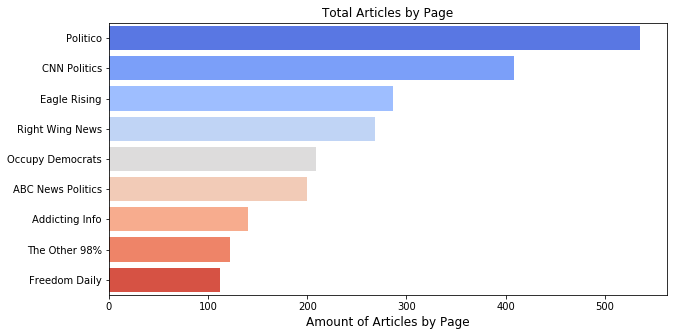

In [10]:
Total_Page_Counts  = Page_Counts
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(y=Total_Page_Counts.index, x=Total_Page_Counts.values, palette='coolwarm',
            saturation=1)
plt.title('Total Articles by Page')
plt.xlabel('Amount of Articles by Page', fontsize=12)
plt.show()

In [11]:
Rating_Counts = df['Rating'].str.split('|', expand=True).stack().value_counts()
print (Rating_Counts)

mostly true                  1669
no factual content            264
mixture of true and false     245
mostly false                  104
dtype: int64


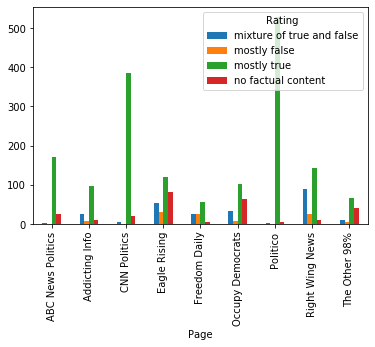

In [12]:
ALL_NEWS = pd.crosstab(df['Page'], df['Rating'])
ALL_NEWS.plot(kind='bar');

In [0]:
CNN = df.loc[(df['Page'] == 'CNN Politics')]
CNN_Fake = df.loc[(df.Page == 'CNN Politics') & 
                  (df.Rating == 'no factual content')]

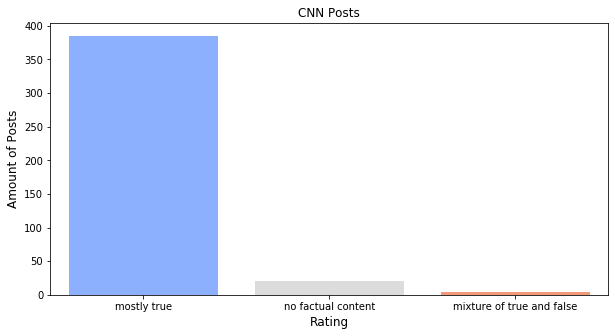

mostly true                  385
no factual content            20
mixture of true and false      4
Name: Rating, dtype: int64

In [47]:
CNN_Posts = CNN['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(CNN_Posts.index, CNN_Posts.values, palette='coolwarm', saturation=1)
plt.title('CNN Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
CNN_Posts

In [0]:
Politico = df.loc[(df['Page'] == 'Politico')]
Politico_Fake = df.loc[(df['Page'] == 'Politico') & 
                       (df.Rating == 'no factual content')]

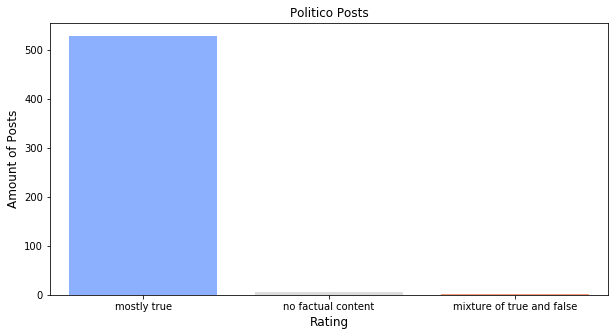

mostly true                  528
no factual content             6
mixture of true and false      2
Name: Rating, dtype: int64

In [48]:
Politico_Posts = Politico['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Politico_Posts.index, Politico_Posts.values, palette='coolwarm', saturation=1)
plt.title('Politico Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
Politico_Posts

In [0]:
Eagle_Rising = df.loc[(df['Page'] == 'Eagle Rising')]
Eagle_Fake = df.loc[(df['Page'] == 'Eagle Rising') & 
                    (df.Rating == 'no factual content')]

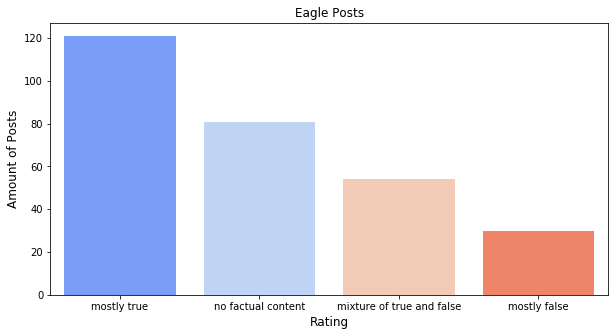

mostly true                  121
no factual content            81
mixture of true and false     54
mostly false                  30
Name: Rating, dtype: int64

In [49]:
Eagle_Posts = Eagle_Rising['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Eagle_Posts.index, Eagle_Posts.values, palette='coolwarm', saturation=1)
plt.title('Eagle Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
Eagle_Posts

In [0]:
Right_Wing_News = df.loc[(df['Page'] == 'Right Wing News')]
Right_Wing_Fake = df.loc[(df['Page'] == 'Right Wing News') & 
                                           (df.Rating == 'no factual content')]

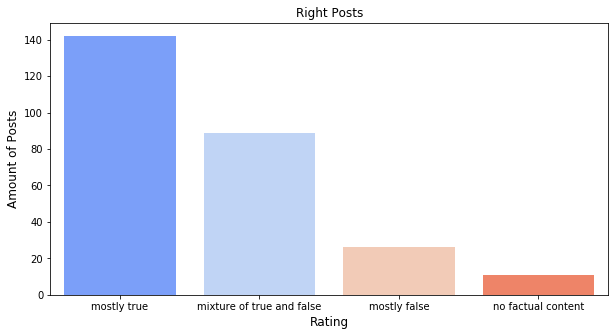

mostly true                  142
mixture of true and false     89
mostly false                  26
no factual content            11
Name: Rating, dtype: int64

In [50]:
Right_Posts = Right_Wing_News['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Right_Posts.index, Right_Posts.values, palette='coolwarm', saturation=1)
plt.title('Right Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
Right_Posts

In [0]:
Occupy_Democrats = df.loc[(df['Page'] == 'Occupy Democrats')]
Occupy_Fake = df.loc[(df['Page'] == 'Occupy Democrats') & 
                     (df.Rating == 'no factual content')]

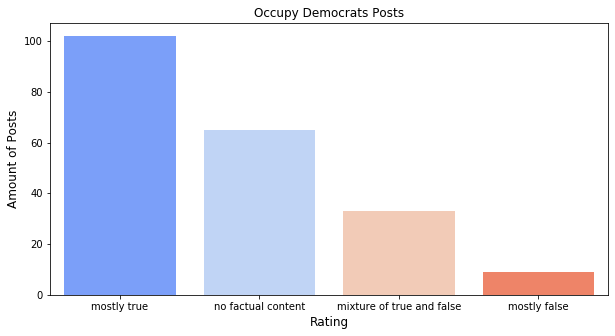

mostly true                  102
no factual content            65
mixture of true and false     33
mostly false                   9
Name: Rating, dtype: int64

In [51]:
Occupy_Posts = Occupy_Democrats['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Occupy_Posts.index, Occupy_Posts.values, palette='coolwarm', saturation=1)
plt.title('Occupy Democrats Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
Occupy_Posts

In [0]:
ABC_News_Politics = df.loc[(df['Page'] == 'ABC News Politics')]
ABC_Fake = df.loc[(df['Page'] == 'ABC News Politics') & 
                  (df.Rating == 'no factual content')]


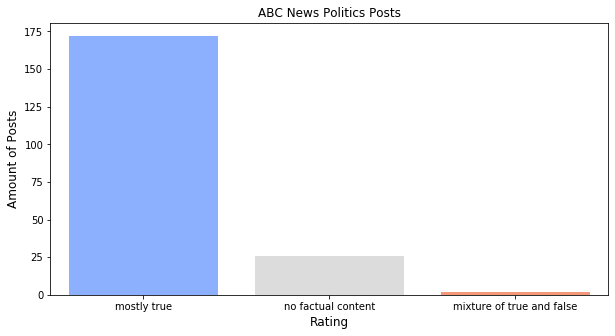

mostly true                  172
no factual content            26
mixture of true and false      2
Name: Rating, dtype: int64

In [52]:
ABC_Posts = ABC_News_Politics['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(ABC_Posts.index, ABC_Posts.values, palette='coolwarm', saturation=1)
plt.title('ABC News Politics Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
ABC_Posts

In [0]:
Addicting_Info = df.loc[(df['Page'] == 'Addicting Info')]
Addicting_Fake = df.loc[(df['Page'] == 'Addicting Info') & 
                        (df.Rating == 'no factual content')]

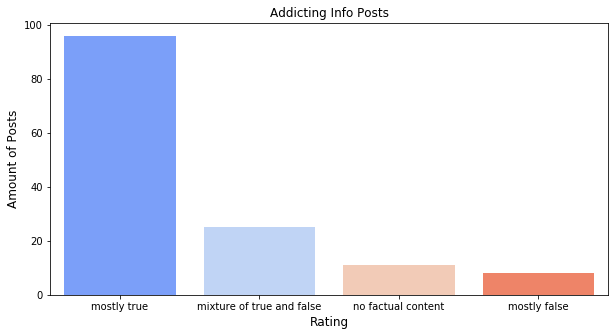

mostly true                  96
mixture of true and false    25
no factual content           11
mostly false                  8
Name: Rating, dtype: int64

In [53]:
Addicting_Posts = Addicting_Info['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Addicting_Posts.index, Addicting_Posts.values, palette='coolwarm', 
            saturation=1)
plt.title('Addicting Info Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
Addicting_Posts

In [0]:
The_Other_98 = df.loc[(df['Page'] == 'The Other 98%')]
The_Other_Fake = df.loc[(df['Page'] == 'The Other 98%') & 
                        (df.Rating == 'no factual content')]

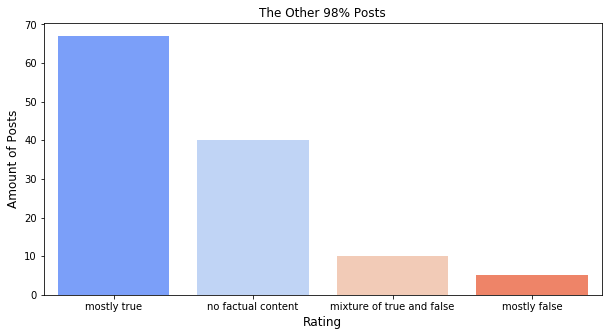

mostly true                  67
no factual content           40
mixture of true and false    10
mostly false                  5
Name: Rating, dtype: int64

In [54]:
The_Other_Posts = The_Other_98['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(The_Other_Posts.index, The_Other_Posts.values, palette='coolwarm', 
            saturation=1)
plt.title('The Other 98% Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
The_Other_Posts

In [0]:
Freedom_Daily = df.loc[(df['Page'] == 'Freedom Daily')]
Freedom_Fake = df.loc[(df['Page'] == 'Freedom Daily') & 
                      (df.Rating == 'no factual content')]


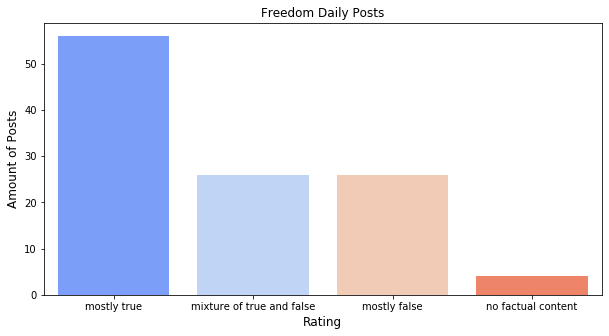

mostly true                  56
mixture of true and false    26
mostly false                 26
no factual content            4
Name: Rating, dtype: int64

In [55]:
Freedom_Posts = Freedom_Daily['Rating'].value_counts()
plt.figure(figsize=(10,5), clear=True,)
sns.barplot(Freedom_Posts.index, Freedom_Posts.values, palette='coolwarm', 
            saturation=1)
plt.title('Freedom Daily Posts')
plt.ylabel('Amount of Posts', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.show()
Freedom_Posts

In [31]:
ABC_Reach = ABC_Fake['reaction_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" ABC Articles:',ABC_Reach)

ABC_Share = ABC_Fake['share_count'].sum().astype(int)
print('The Total Shares for "No Factual Content" ABC Articles:',ABC_Share)

ABC_Comment = ABC_Fake['comment_count'].sum().astype(int)
print('The Total Comments for"No Factual Content" ABC Articles:',ABC_Comment)


The Total Reactions for "No Factual Content" ABC Articles: 4131
The Total Shares for "No Factual Content" ABC Articles: 938
The Total Comments for"No Factual Content" ABC Articles: 2677


In [32]:
CNN_Reach = CNN_Fake['reaction_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" CNN Articles:',CNN_Reach)

CNN_Share = CNN_Fake['share_count'].sum().astype(int)
print('The Total Shares for "No Factual Content" CNN Articles:',CNN_Share)

CNN_Comment = CNN_Fake['comment_count'].sum().astype(int)
print('The Total Comments for"No Factual Content" CNN Articles:',CNN_Comment)

The Total Reactions for "No Factual Content" CNN Articles: 13125
The Total Shares for "No Factual Content" CNN Articles: 4301
The Total Comments for"No Factual Content" CNN Articles: 6926


In [33]:
Politico_Reach = Politico_Fake['reaction_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Politico Articles:',
      Politico_Reach)

Politico_Share = Politico_Fake['share_count'].sum().astype(int)
print('The Total Shares for "No Factual Content"  Articles:',Politico_Share)

Politico_Comment = Politico_Fake['comment_count'].sum().astype(int)
print('The Total Comments for"No Factual Content" CNN Articles:',Politico_Comment)

The Total Reactions for "No Factual Content" Politico Articles: 2519
The Total Shares for "No Factual Content"  Articles: 498
The Total Comments for"No Factual Content" CNN Articles: 324


In [41]:
Eagle_Rising_Reach = Eagle_Fake['reaction_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Eagle_Rising Ariticles:',Eagle_Rising_Reach)

Eagle_Rising_Share = Eagle_Fake['share_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Eagle_Rising Ariticles:',Eagle_Rising_Share)

Eagle_Rising_Comment = Eagle_Fake['comment_count'].sum().astype(int)
print('The Total Comments for "No Factual Content" Eagle_Rising Ariticles:',Eagle_Rising_Comment)

The Total Reactions for "No Factual Content" Eagle_Rising Ariticles: 46432
The Total Reactions for "No Factual Content" Eagle_Rising Ariticles: 37449
The Total Comments for "No Factual Content" Eagle_Rising Ariticles: 3935


In [44]:
Right_Wing_News_Reach = Right_Wing_Fake['reaction_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Right_Wing_News Ariticles:',Right_Wing_News_Reach)

Right_Wing_News_Share = Right_Wing_Fake['share_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Right_Wing_News Ariticles:',Right_Wing_News_Share)

Right_Wing_News_Comment = Right_Wing_Fake['comment_count'].sum().astype(int)
print('The Total Comments for "No Factual Content" Right_Wing_News Ariticles:',Right_Wing_News_Comment)

The Total Reactions for "No Factual Content" Right_Wing_News Ariticles: 106758
The Total Reactions for "No Factual Content" Right_Wing_News Ariticles: 84846
The Total Comments for "No Factual Content" Right_Wing_News Ariticles: 3964


In [45]:
Occupy_Democrats_Reach = Occupy_Democrats['reaction_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Occupy_Democrats Articles:',Occupy_Democrats_Reach)

Occupy_Democrats_Share = Occupy_Democrats['share_count'].sum().astype(int)
print('The Total Reactions for "No Factual Content" Occupy_Democrats Articles:',Occupy_Democrats_Share)

Occupy_Democrats_Comment = Occupy_Democrats['comment_count'].sum().astype(int)
print('The Total Comments for "No Factual Content" Occupy_Democrats Articles:',Occupy_Democrats_Comment)

The Total Reactions for "No Factual Content" Occupy_Democrats Articles: 7245766
The Total Reactions for "No Factual Content" Occupy_Democrats Articles: 5870149
The Total Comments for "No Factual Content" Occupy_Democrats Articles: 597343


The Total Reactions for All ABC_News_Politics Ariticles: 35334
The Total Reactions for All ABC_News_Politics Ariticles: 7828
The Total Comments for All ABC_News_Politics Ariticles: 14287


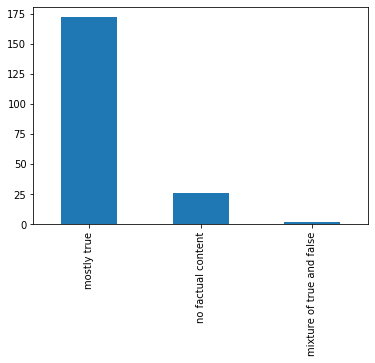

In [37]:
ABC_News_Politics_Articles = ABC_News_Politics['Rating'].value_counts().astype(int)
ABC_News_Politics_Articles.plot(kind='bar');
ABC_News_Politics_Reach = ABC_News_Politics['reaction_count'].sum().astype(int)
print('The Total Reactions for All ABC_News_Politics Ariticles:',ABC_News_Politics_Reach)
ABC_News_Politics_Share = ABC_News_Politics['share_count'].sum().astype(int)
print('The Total Reactions for All ABC_News_Politics Ariticles:',ABC_News_Politics_Share)
ABC_News_Politics_Comment = ABC_News_Politics['comment_count'].sum().astype(int)
print('The Total Comments for All ABC_News_Politics Ariticles:',ABC_News_Politics_Comment)

The Total Reactions for All Addicting_Info Ariticles: 436843
The Total Reactions for All Addicting_Info Ariticles: 170228
The Total Comments for All Addicting_Info Ariticles: 54917


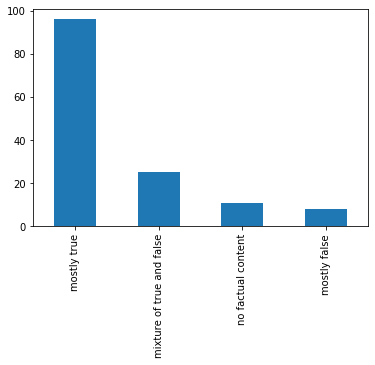

In [38]:
Addicting_Info_Articles = Addicting_Info['Rating'].value_counts().astype(int)
Addicting_Info_Articles.plot(kind='bar');
Addicting_Info_Reach = Addicting_Info['reaction_count'].sum().astype(int)
print('The Total Reactions for All Addicting_Info Ariticles:',Addicting_Info_Reach)
Addicting_Info_Share = Addicting_Info['share_count'].sum().astype(int)
print('The Total Reactions for All Addicting_Info Ariticles:',Addicting_Info_Share)
Addicting_Info_Comment = Addicting_Info['comment_count'].sum().astype(int)
print('The Total Comments for All Addicting_Info Ariticles:',Addicting_Info_Comment)

The Total Reactions for All The_Other_98 Ariticles: 2537491
The Total Reactions for All The_Other_98 Ariticles: 1908770
The Total Comments for All The_Other_98 Ariticles: 110674


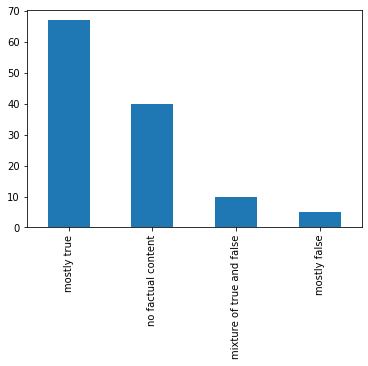

In [39]:
The_Other_98_Articles = The_Other_98['Rating'].value_counts().astype(int)
The_Other_98_Articles.plot(kind='bar');
The_Other_98_Reach = The_Other_98['reaction_count'].sum().astype(int)
print('The Total Reactions for All The_Other_98 Ariticles:',The_Other_98_Reach)
The_Other_98_Share = The_Other_98['share_count'].sum().astype(int)
print('The Total Reactions for All The_Other_98 Ariticles:',The_Other_98_Share)
The_Other_98_Comment = The_Other_98['comment_count'].sum().astype(int)
print('The Total Comments for All The_Other_98 Ariticles:',The_Other_98_Comment)

The Total Reactions for All Freedom Daily Ariticles: 409047
The Total Reactions for All Freedom_Daily_Articles Ariticles: 274657
The Total Comments for All Freedom_Daily_Articles Ariticles: 57301


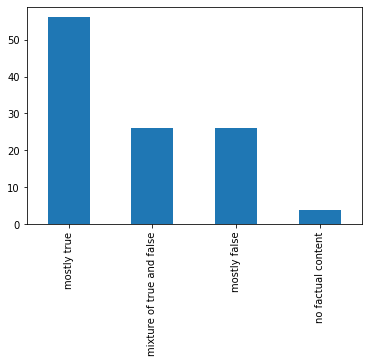

In [40]:
Freedom_Daily_Articles = Freedom_Daily['Rating'].value_counts().astype(int)
Freedom_Daily_Articles.plot(kind='bar');
Freedom_Daily_Reach = Freedom_Daily['reaction_count'].sum().astype(int)
print('The Total Reactions for All Freedom Daily Ariticles:',Freedom_Daily_Reach)
Freedom_Daily_Articles_Share = Freedom_Daily['share_count'].sum().astype(int)
print('The Total Reactions for All Freedom_Daily_Articles Ariticles:',Freedom_Daily_Articles_Share)
Freedom_Daily_Articles_Comment = Freedom_Daily['comment_count'].sum().astype(int)
print('The Total Comments for All Freedom_Daily_Articles Ariticles:',Freedom_Daily_Articles_Comment)

